<h1>Real Estate Valuation with Multi-Linear Regression Model</h1>


# Importing Libraries


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [0]:
dataset = pd.read_csv('real_estate_valuation_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[ 32.       84.87882  10.       24.98298 121.54024]
 [ 19.5     306.5947    9.       24.98034 121.53951]
 [ 13.3     561.9845    5.       24.98746 121.54391]
 ...
 [ 18.8     390.9696    7.       24.97923 121.53986]
 [  8.1     104.8101    5.       24.96674 121.54067]
 [  6.5      90.45606   9.       24.97433 121.5431 ]]


In [5]:
print(y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

# Splitting the dataset into the training and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
print(X_train)

[[1.6500000e+01 2.2880110e+03 3.0000000e+00 2.4958850e+01 1.2151359e+02]
 [4.5000000e+00 2.2758770e+03 3.0000000e+00 2.4963140e+01 1.2151151e+02]
 [3.8300000e+01 4.3971050e+02 0.0000000e+00 2.4971610e+01 1.2153423e+02]
 ...
 [1.3600000e+01 4.1973490e+03 0.0000000e+00 2.4938850e+01 1.2150383e+02]
 [3.5900000e+01 6.4073910e+02 3.0000000e+00 2.4975630e+01 1.2153715e+02]
 [6.6000000e+00 9.0456060e+01 9.0000000e+00 2.4974330e+01 1.2154310e+02]]


In [8]:
print(X_test)

[[1.0300000e+01 2.1144730e+02 1.0000000e+00 2.4974170e+01 1.2152999e+02]
 [2.4000000e+01 4.5276870e+03 0.0000000e+00 2.4947410e+01 1.2149628e+02]
 [3.4500000e+01 3.2494190e+02 6.0000000e+00 2.4978140e+01 1.2154170e+02]
 [2.5600000e+01 4.5196900e+03 0.0000000e+00 2.4948260e+01 1.2149587e+02]
 [1.4400000e+01 1.6998030e+02 1.0000000e+00 2.4973690e+01 1.2152979e+02]
 [3.6600000e+01 4.8881930e+02 8.0000000e+00 2.4970150e+01 1.2154494e+02]
 [3.5800000e+01 1.7073110e+02 7.0000000e+00 2.4967190e+01 1.2154269e+02]
 [3.4800000e+01 4.0521340e+02 1.0000000e+00 2.4973490e+01 1.2153372e+02]
 [1.0500000e+01 2.7917260e+02 7.0000000e+00 2.4975280e+01 1.2154541e+02]
 [1.7200000e+01 3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02]
 [1.3300000e+01 2.5063100e+02 7.0000000e+00 2.4966060e+01 1.2154297e+02]
 [1.3300000e+01 3.3605320e+02 5.0000000e+00 2.4957760e+01 1.2153438e+02]
 [1.2700000e+01 1.8748230e+02 1.0000000e+00 2.4973880e+01 1.2152981e+02]
 [3.4000000e+01 1.5760520e+02 7.0000000e+00 2.49662

In [9]:
print(y_train)

[ 23.2  29.3  38.4  37.5  34.3  44.8  54.4  37.9   7.6  29.5  25.3  13.7
  30.   30.8  40.6  20.7  40.8  55.3  40.5  40.8  40.3  33.1  26.2  41.9
  18.8  78.   15.6  39.4  41.   23.5  35.6  47.1  35.6  55.   41.5  37.4
  21.8  31.3  36.8  26.6  40.   50.   38.1  59.5  56.8  25.3  32.4  37.8
  49.8  52.7  21.8  28.8  29.3  37.4  37.4  44.   50.7  42.3  36.5  51.4
  32.9  38.6  21.4  50.4  37.4  52.2  58.8  43.8  22.1  53.3  17.4  45.7
  36.6  39.7  15.4  12.2  46.6  31.3  22.3  23.1  17.4  46.8  32.9  62.9
  25.5  42.2  42.5  39.5  49.3  31.3  11.6  55.1  19.   34.6  50.8  63.2
  43.4  35.1  27.3  41.2  37.2  23.1  14.7  34.1  37.5  42.   25.6  53.3
  41.4  20.   47.4  24.7  38.5  49.   57.1  55.9  36.9  25.6  20.7  37.
  29.5  33.6  47.3  23.9  18.3  35.7  67.7  40.6  43.5  31.1  51.8  61.9
  56.3  63.3  48.1  18.6  20.5  20.9  27.3  26.6  34.   52.2  56.8  38.8
  44.   39.7  53.9  30.6  42.3  41.   16.1  39.4  73.6  44.5  36.7  30.5
  15.9  42.3  34.1  26.5  24.4  31.7  40.8  23.8  28

In [10]:
print(y_test)

[45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1 42.  42.4 28.5 39.1
 53.7 36.8 40.6 55.2 39.3 44.3 53.5 25.3 22.8 51.7 45.5 34.4 31.6 25.9
 49.5 24.7 51.7 29.7 45.4 50.5 26.5 30.1 46.1 28.9 54.4 15.  44.9 29.8
 23.6 48.  16.7 40.9 40.2 12.9 21.3 62.1 63.9 40.3 42.2 19.1 28.4 28.5
 60.7 37.5 39.3 28.8 42.3 44.3 42.6 57.4 42.2 25.7 13.2 27.  56.2 38.3
 20.8 43.1 78.3 20.9 32.5 33.4 32.1 19.2 53.  38.2 46.7 24.6 36.2]


# Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the dataset on the training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the test set

In [0]:
y_pred = regressor.predict(X_test)


In [14]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[45.3  41.39]
 [14.4  12.36]
 [46.   41.11]
 [15.6  12.17]
 [50.2  40.36]
 [38.1  40.21]
 [48.5  39.9 ]
 [41.4  33.93]
 [51.6  48.1 ]
 [40.1  44.58]
 [42.   45.26]
 [42.4  40.66]
 [28.5  40.78]
 [39.1  40.22]
 [53.7  48.75]
 [36.8  35.92]
 [40.6  40.01]
 [55.2  42.36]
 [39.3  41.87]
 [44.3  43.59]
 [53.5  52.19]
 [25.3  30.85]
 [22.8  41.18]
 [51.7  45.93]
 [45.5  47.43]
 [34.4  44.57]
 [31.6  45.07]
 [25.9  28.61]
 [49.5  47.71]
 [24.7  23.63]
 [51.7  42.75]
 [29.7  32.98]
 [45.4  44.01]
 [50.5  36.22]
 [26.5  45.21]
 [30.1  30.79]
 [46.1  47.69]
 [28.9  38.97]
 [54.4  54.02]
 [15.   10.13]
 [44.9  51.28]
 [29.8  34.15]
 [23.6  35.86]
 [48.   47.99]
 [16.7  14.72]
 [40.9  42.57]
 [40.2  44.59]
 [12.9  15.29]
 [21.3  32.7 ]
 [62.1  46.45]
 [63.9  51.98]
 [40.3  41.29]
 [42.2  49.08]
 [19.1  24.51]
 [28.4  30.87]
 [28.5  35.78]
 [60.7  48.51]
 [37.5  40.5 ]
 [39.3  45.37]
 [28.8  33.08]
 [42.3  42.27]
 [44.3  42.29]
 [42.6  39.65]
 [57.4  48.25]
 [42.2  39.07]
 [25.7  30.06]
 [13.2  12

## Evaluate the regression model

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
#the sample size
n = len(y)
#the number of independent variables
p = X.shape[1]

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
np.set_printoptions(precision = 5)
#print("n = {:}".format(n))
#print("p = {:}".format(p))
print("R-squared: {:.5f}".format(r2))
print("Adjusted R-squared: {:.5f}".format(1 - (1 - r2)* (n - 1)/(n - p - 1)))
print("MAE (Mean Absolute Error): {:.5f}".format(mae))
print("RMSE (Root Mean Squared Error): {:.5f}".format(rmse))



R-squared: 0.64207
Adjusted R-squared: 0.63768
MAE (Mean Absolute Error): 5.74593
RMSE (Root Mean Squared Error): 7.88494


# Equation

In [16]:
coef = regressor.coef_
intercept = regressor.intercept_
print(coef)
print(intercept)

[-2.9904  -5.20873  3.28502  3.04636 -0.01879]
37.97643504531678


In [17]:
print(dataset.columns[-1] + " =", end = '')
for column in range(0, len(list(dataset.columns)) - 1):
  print(" {:.5f} × ".format(coef[column]) + list(dataset.columns)[column], end = '')
  if column == len(list(dataset.columns)) - 2:
    print(" " if intercept < 0 else " +", end = '')
  elif coef[column + 1] < 0:
    print(" ", end = '')
  else:
    print(" +", end = '')
print(intercept)

house price of unit area (NT$/Ping) = -2.99040 × house age  -5.20873 × distance to the nearest MRT station (m) + 3.28502 × number of convenience stores + 3.04636 × latitude  -0.01879 × longitude +37.97643504531678


## Applying PCA (Principal Component Analysis) for all variables

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5, random_state = 0)
pca.fit_transform(X_train)

array([[ 1.70838, -0.03541,  0.23771, -0.52705, -0.18961],
       [ 1.59925, -1.02157,  0.76543, -0.52337, -0.21738],
       [ 0.24542,  1.70018, -0.43046,  1.48841, -0.58455],
       ...,
       [ 4.07618, -0.45886, -0.39557, -0.62312,  0.18591],
       [-0.38311,  1.6071 , -0.12578,  0.74231, -0.11202],
       [-1.80123, -0.8283 ,  0.12753, -1.07735,  0.11884]])

## PCA Scree Plot

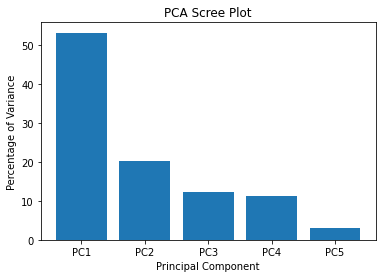

In [19]:
variance_percentage = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
plt.bar(x = range(0, 5), height = variance_percentage, tick_label = columns)
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance')
plt.show()

In [20]:
print(pca.explained_variance_ratio_ * 100)

[53.20967 20.28096 12.21821 11.26392  3.02724]


## Applying PCA (Principal Component Analysis) for 2 variables

In [0]:
pca = PCA(n_components = 2, random_state = 0)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Training the dataset on the training set

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the test set result

In [0]:
y_pred = regressor.predict(X_test)


In [24]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[45.3  39.68]
 [14.4  11.71]
 [46.   41.56]
 [15.6  11.45]
 [50.2  38.75]
 [38.1  41.61]
 [48.5  40.78]
 [41.4  34.37]
 [51.6  48.18]
 [40.1  44.75]
 [42.   45.43]
 [42.4  40.1 ]
 [28.5  39.12]
 [39.1  40.89]
 [53.7  48.73]
 [36.8  36.81]
 [40.6  41.6 ]
 [55.2  41.  ]
 [39.3  41.72]
 [44.3  43.7 ]
 [53.5  50.82]
 [25.3  36.11]
 [22.8  40.43]
 [51.7  45.98]
 [45.5  48.24]
 [34.4  45.28]
 [31.6  45.68]
 [25.9  27.16]
 [49.5  47.38]
 [24.7  35.21]
 [51.7  42.99]
 [29.7  37.21]
 [45.4  42.05]
 [50.5  38.88]
 [26.5  45.79]
 [30.1  36.06]
 [46.1  46.28]
 [28.9  35.51]
 [54.4  51.11]
 [15.    6.27]
 [44.9  50.58]
 [29.8  34.55]
 [23.6  33.05]
 [48.   46.58]
 [16.7  15.13]
 [40.9  42.31]
 [40.2  43.29]
 [12.9  15.48]
 [21.3  30.43]
 [62.1  45.18]
 [63.9  50.64]
 [40.3  40.67]
 [42.2  47.47]
 [19.1  26.76]
 [28.4  36.13]
 [28.5  38.48]
 [60.7  48.34]
 [37.5  40.66]
 [39.3  45.52]
 [28.8  37.3 ]
 [42.3  41.4 ]
 [44.3  42.61]
 [42.6  37.79]
 [57.4  48.31]
 [42.2  40.07]
 [25.7  27.81]
 [13.2  11

# Evaluate the regression model

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
#the sample size
n = len(y)
#the number of independent variables
p = X.shape[1]

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
np.set_printoptions(precision = 5)
#print("n = {:}".format(n))
#print("p = {:}".format(p))
print("R-squared: {:.5f}".format(r2))
print("Adjusted R-squared: {:.5f}".format(1 - (1 - r2)* (n - 1)/(n - p - 1)))
print("MAE (Mean Absolute Error): {:.5f}".format(mae))
print("RMSE (Root Mean Squared Error): {:.5f}".format(rmse))



R-squared: 0.59992
Adjusted R-squared: 0.59502
MAE (Mean Absolute Error): 6.35184
RMSE (Root Mean Squared Error): 8.33624
